In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

import os

import puzzletools as tools
from puzzlesolving import PuzzlePiece

# create a list of all the images in the folder
# Gets the puzzle piece image
def get_piece_image(path):
    # images are of the format piece#.png
    img = cv2.imread(path)
    return img

piece_dir = '../dataset/pieces-clean'
image_files = os.listdir(piece_dir)
image_files = sorted(image_files, key=lambda x: int(x[5:-4]))

# load all off the images
piece_images = []
for i in range(len(image_files)):
    piece_images.append( get_piece_image(os.path.join(piece_dir, image_files[i])) )
    
piece_contours = []
for i in range(len(piece_images)):
    piece_contours.append(tools.get_contour(piece_images[i]))

In [2]:
def test1():
    corners = []
    for i in range(len(piece_contours)):
        corners.append(tools.find_corners(piece_contours[i]))
        
    def get_shortest_edge(corners, contour_len):
        shortest_edge = np.inf
        for i in range(4):
            length = corners[i] - corners[i-1]
            if length < 0:
                length += contour_len
            if length < shortest_edge:
                shortest_edge = length
        return shortest_edge
    def get_longest_edge(corners, contour_len):
        longest_edge = 0
        for i in range(4):
            length = corners[i] - corners[i-1]
            if length < 0:
                length += contour_len
            if length > longest_edge:
                longest_edge = length
        return longest_edge

    # find shortest and longest edges
    short_lengths = np.zeros(len(piece_contours))
    long_lengths = np.zeros(len(piece_contours))
    for i in range(len(corners)):
        short_lengths[i] = get_shortest_edge(corners[i], len(piece_contours[i]))
        long_lengths[i] = get_longest_edge(corners[i], len(piece_contours[i]))

    indices = np.argsort(short_lengths)
    for i in range(10):
        print("Length: {}, Index: {}".format(short_lengths[indices[i]], indices[i]))

    indices = np.argsort(long_lengths)
    for i in range(10):
        print("Length: {}, Index: {}".format(long_lengths[indices[i]], indices[i]))

In [3]:
# test the puzzle piece class
def test2(i = 499):
    
    piece = PuzzlePiece(piece_contours[i])
    plt.plot(piece.normalized_edges[0][:,0], piece.normalized_edges[0][:,1])

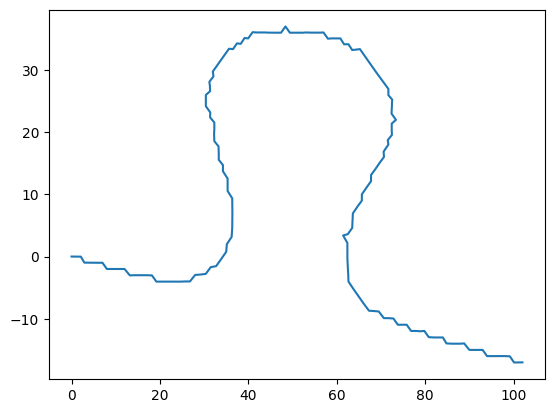

In [4]:
test2(55)